In [1]:
import lime
from lime import lime_image
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 Dataset

The CIFAR-10 dataset is a popular dataset used in machine learning and computer vision for image classification tasks. 

## Key Characteristics:

- **Number of Images**: 60,000
- **Image Dimensions**: 32x32 pixels
- **Color Channels**: 3 (RGB)
- **Number of Classes**: 10
- **Classes**: Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck
- **Images per Class**: 6,000
- **Training-Testing Split**: 50,000 training images, 10,000 testing images

## Usage:

The CIFAR-10 dataset is widely used for developing, training, and evaluating machine learning models in the field of image recognition. The dataset’s small image size and varied content make it challenging yet manageable, providing a balanced dataset for both beginners and advanced practitioners to test their models.


In [2]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images,
                               test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse',
    'ship', 'truck'
]

# Convolutional Neural Network (CNN)

A Convolutional Neural Network (CNN) is a type of deep learning model specifically designed for pattern recognition in images. It automates the extraction of features from images, making it highly effective for tasks like image recognition and object detection.

## Key Components of a CNN:

1. **Input Layer**: 
   - Takes in the image as an array of pixel values.

2. **Convolutional Layer**: 
   - Applies various filters to detect features like edges, textures, and complex patterns.
   - Each filter produces a feature map highlighting areas where a specific feature is detected.

3. **Pooling Layer**: 
   - Reduces the spatial dimensions (width and height) of the input volume.
   - Helps in making the detection of features invariant to scale and orientation changes.

4. **Fully Connected Layer**: 
   - Flattens the output and prepares it for classification.
   - Uses the features extracted by previous layers to make the final classification decision.

CNNs leverage the spatial hierarchy of features in an image, allowing them to provide state-of-the-art results in image analysis tasks.


In [3]:
# Define a simple CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile and train the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])
model.fit(train_images,
          train_labels,
          epochs=10,
          validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5171 - accuracy: 0.4460 - val_loss: 1.2815 - val_accuracy: 0.5355
Epoch 2/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.1645 - accuracy: 0.5852 - val_loss: 1.1827 - val_accuracy: 0.5823
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0082 - accuracy: 0.6443 - val_loss: 0.9537 - val_accuracy: 0.6667
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9152 - accuracy: 0.6782 - val_loss: 0.9817 - val_accuracy: 0.6556
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8448 - accuracy: 0.7035 - val_loss: 0.9635 - val_accuracy: 0.6680
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7866 - accuracy: 0.7251 - val_loss: 0.8844 - val_accuracy: 0.6938
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7433 - accuracy: 0.7388 - val_loss: 0.9009 - val_ac

In [7]:
# Create a LIME Image Explainer
explainer = lime_image.LimeImageExplainer()

# Choose a random image from the test set
#i = np.random.randint(0, test_images.shape[0])
i = 42
image = test_images[i]

# Get the model's prediction for this image
exp = explainer.explain_instance(image,
                                 model.predict,
                                 top_labels=5,
                                 hide_color=0,
                                 num_samples=1000)

# Show the image and the explanation
temp, mask = exp.get_image_and_mask(exp.top_labels[0],
                                    positive_only=False,
                                    num_features=5,
                                    hide_rest=False)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 7ms/step


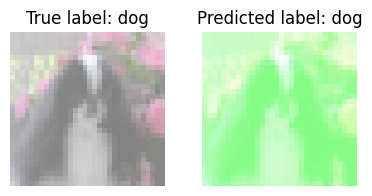

In [8]:
# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4, 2))

# Show the original image in the first subplot
ax1.imshow(image / 2 + 0.5)  # Assuming the image is scaled between 0 and 1
ax1.set_title(f"True label: {class_names[test_labels[i][0]]}")
ax1.axis('off')  # Hide the axis

# Show the LIME explanation in the second subplot
ax2.imshow(mark_boundaries(temp / 2 + 0.5, mask))
ax2.set_title(f"Predicted label: {class_names[exp.top_labels[0]]}")
ax2.axis('off')  # Hide the axis

# Display the figure
plt.tight_layout()
plt.show()